In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
import seaborn as sns

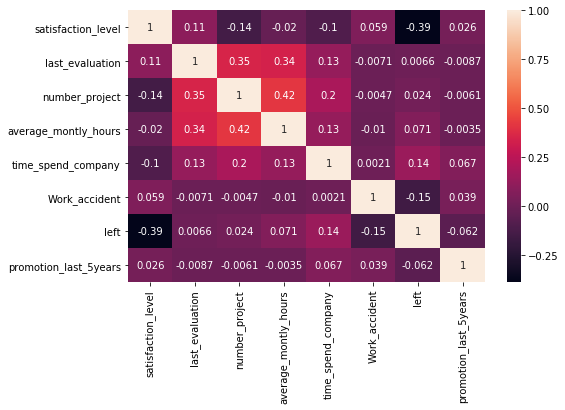

In [78]:
# It wasn't necessary
plt.subplots(figsize=(8,5))
ax = sns.heatmap(data.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax

In [79]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##### Satisfaction level is low (0.44) for those who left in comparison to those retained (0.66) 
##### Average monthly hours 
##### Work accident (?)
##### Promotion

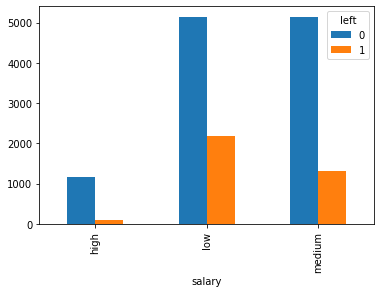

In [80]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

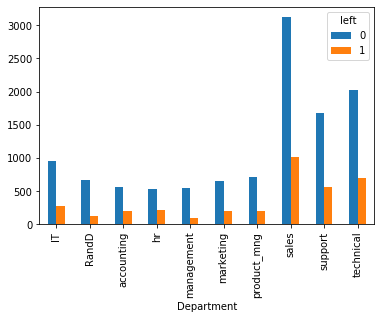

In [81]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [82]:
LR = LogisticRegression()

### Salary must be converted to dummies

In [83]:
new = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [84]:
new_dummy=pd.get_dummies(new,columns=['salary'])
new_dummy

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,1,0
14995,0.37,160,0,1,0,1,0
14996,0.37,143,0,1,0,1,0
14997,0.11,280,0,1,0,1,0


In [85]:
X = new_dummy[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']]
Y = new_dummy[['left']]
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [91]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
5920,0.81,255,0,0,1,0
7480,0.65,238,0,1,0,0
14826,0.10,267,0,0,0,1
13478,0.70,110,0,0,1,0
14901,0.11,140,0,0,0,1
...,...,...,...,...,...,...
5026,0.84,208,0,0,1,0
3069,0.98,198,0,0,0,1
2847,0.76,189,0,0,1,0
243,0.40,128,0,0,1,0


In [87]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
8757,0.49,196,0,0,0,1
12294,0.10,253,0,0,0,1
5665,0.50,178,0,0,0,1
7570,0.79,216,0,0,0,1
423,0.40,143,0,1,0,0
...,...,...,...,...,...,...
12971,0.59,257,0,0,1,0
1132,0.77,150,0,0,1,0
11300,0.77,263,0,0,1,0
1033,0.42,158,0,0,1,0


In [93]:
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)
prediction

C:\Users\JISHNU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JISHNU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
LR.score(x_test,y_test)

0.7802666666666667